# Import Libraries and data:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.manifold import TSNE
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataframe
df = pd.read_csv("data/df1.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,...,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,-1.15,1.6128,2.601124,36.7388,0.0,0.0,21.0,10.548938,8.664184,10.438653,...,128.169250,16.498300,1.833144,4.749993,4.749993,0.0,108.0,6.0,2.057,34.0
1,-1.92,2.0167,4.067079,35.9129,0.0,0.0,23.0,10.548938,8.996276,9.770745,...,130.185132,16.655024,1.850558,5.348035,5.348035,0.0,108.0,7.0,1.844,32.0
2,-0.22,0.3936,0.154921,30.9848,0.0,0.0,14.0,55.355967,14.981043,24.182657,...,196.983795,16.327527,1.814170,11.893467,9.458406,0.0,96.0,8.0,-0.095,36.0
3,-0.23,0.0671,0.004502,27.9149,0.0,0.0,15.0,12.097876,9.328368,12.877306,...,130.098944,16.327527,1.814170,9.458406,9.458406,0.0,96.0,8.0,-0.406,36.0
4,-4.23,2.9480,8.690704,45.0132,0.0,0.0,10.0,47.564750,17.758853,31.375344,...,226.315572,16.322301,1.813589,11.954832,0.000000,0.0,92.0,10.0,4.068,36.0


# PCA :

In [3]:

x_values = df.iloc[:,1:].values
y_values = df.iloc[:,0].values.ravel()

n_components = 2

pca = PCA(n_components=n_components)
components = pca.fit_transform(x_values)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'logS_aq_avg'

fig = px.scatter_matrix(
    components,
    color=y_values,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


# t- SNE plot

In [5]:
# get the features and label from the original dataframe
tsne_descriptors = TSNE(n_components=2, random_state = 42)
x_tsne = tsne_descriptors.fit_transform(x_values)

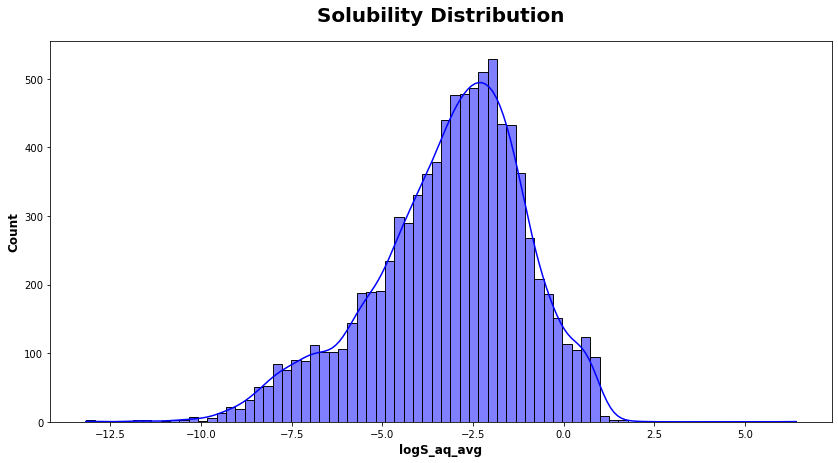

In [6]:
# Target feature univarient analysis
plt.subplots(figsize=(14,7))
sns.histplot(df.logS_aq_avg,  kde=True, color = 'b')
plt.title("Solubility Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("logS_aq_avg", weight="bold", fontsize=12)
plt.show()

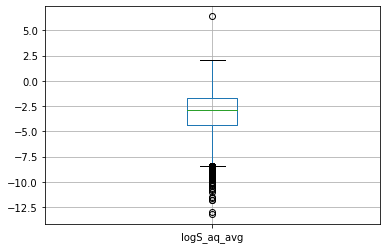

In [7]:
boxplot = df.boxplot(column=['logS_aq_avg'])  


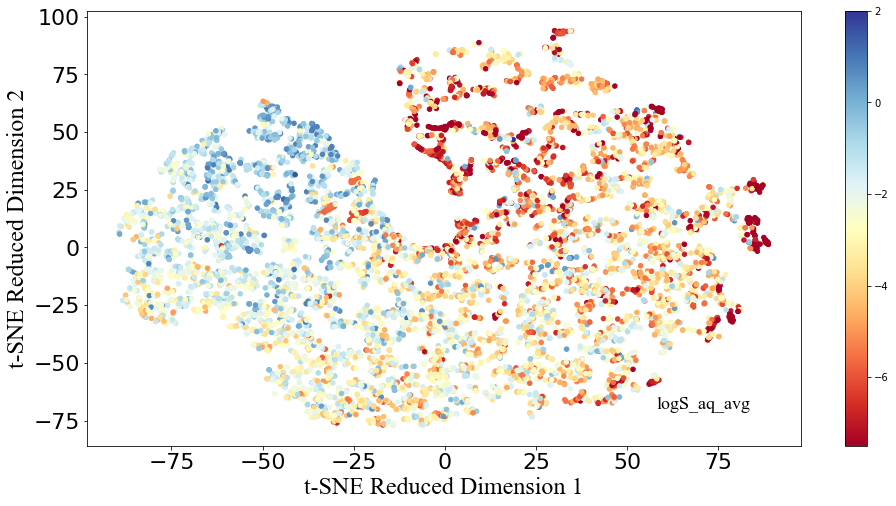

In [8]:
# draw tsne
cm = plt.cm.get_cmap('RdYlBu')
plt.figure(figsize=(16, 8))
plt.xticks(size = 22)
plt.yticks(size = 22)
plt.xlabel('t-SNE Reduced Dimension 1',fontproperties = 'Times New Roman', size = 24)
plt.ylabel('t-SNE Reduced Dimension 2',fontproperties = 'Times New Roman', size = 24)
plt.scatter(x_tsne[:, 0], x_tsne[:,1],c= y_values,vmin= -7.5, vmax= 2, s= 20, cmap=cm)
plt.colorbar()
plt.text(58, -70, "logS_aq_avg", fontproperties = 'Times New Roman', size = 18)
plt.savefig("results/TSNE.png", bbox_inches='tight', pad_inches= 0)
tsne_image = Image.open('results/TSNE.png')
tsne_image.show()
